# Code to simulate Dispersion measure curve

In [12]:
pip install pyvisa


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 494.7 kB/s eta 0:00:00 kB/s eta 0:00:01:01
Note: you may need to restart the kernel to use updated packages.


Total delay: 11.527777777777779 s
Time delay between two consecutive bins (linear spacing): [0.06241757 0.0630534  0.0636979  0.0643512  0.06501348 0.06568487
 0.06636554 0.06705565 0.06775536 0.06846483 0.06918425 0.06991378
 0.07065361 0.07140391 0.07216487 0.07293668 0.07371954 0.07451365
 0.0753192  0.0761364  0.07696547 0.07780662 0.07866007 0.07952605
 0.08040478 0.08129651 0.08220148 0.08311993 0.08405211 0.08499828
 0.08595871 0.08693366 0.08792342 0.08892825 0.08994845 0.09098432
 0.09203616 0.09310427 0.09418898 0.0952906  0.09640946 0.09754592
 0.0987003  0.09987297 0.10106429 0.10227464 0.10350438 0.10475393
 0.10602367 0.10731401 0.10862537 0.10995819 0.11131291 0.11268996
 0.11408983 0.11551298 0.1169599  0.11843109 0.11992705 0.12144831
 0.12299542 0.12456891 0.12616936 0.12779734 0.12945345 0.1311383
 0.13285251 0.13459674 0.13637163 0.13817786 0.14001614 0.14188716
 0.14379168 0.14573043 0.14770419 0.14971376 0.15175995 0.15384359
 0.15596556 0.15812673 0.16032801 0.16

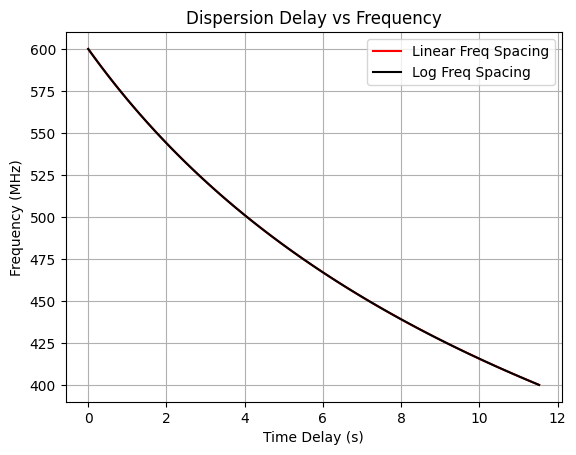

In [3]:
import numpy as np
import time 
import matplotlib.pyplot as plt

# --- Parameters ---
f_start_mhz = 600  # MHz
f_end_mhz = 400    # MHz
DM = 800           # pc/cm^3
K = 4.15e3         # s·MHz² pc^-1 cm³

# --- Frequency arrays ---
f = np.linspace(f_start_mhz, f_end_mhz, 100)             # Linear spacing
f_log = np.logspace(np.log10(f_start_mhz), np.log10(f_end_mhz), 100)  # Log spacing

# --- Total delay from f_start to f_end ---
total_delay = K * DM * ((1 / f_end_mhz**2) - (1 / f_start_mhz**2))
print("Total delay:", total_delay, 's')

# --- Time delays (relative to f_start) ---
time_delay = K * DM * (1 / f**2 - 1 / f_start_mhz**2)
time_delay_log = K * DM * (1 / f_log**2 - 1 / f_start_mhz**2)

# --- Differences between consecutive time bins ---
time_difference = np.diff(time_delay)
print("Time delay between two consecutive bins (linear spacing):", time_difference)

# --- Plot ---
plt.plot(time_delay, f, '-r', label="Linear Freq Spacing")
plt.plot(time_delay_log, f_log, '-k', label="Log Freq Spacing")
plt.title('Dispersion Delay vs Frequency')
plt.xlabel('Time Delay (s)')
plt.ylabel('Frequency (MHz)')
plt.legend()
plt.grid(True)
#plt.gca().invert_yaxis()  # Optional: High freq on top
plt.show()


Total delay: 11.527777777777779 s
Time delay in each frequency bin: [ 9.22222222  9.28463979  9.34769319  9.41139109  9.47574229  9.54075577
  9.60644064  9.67280618  9.73986183  9.80761719  9.87608202  9.94526627
 10.01518006 10.08583366 10.15723757 10.22940244 10.30233913 10.37605867
 10.45057232 10.52589152 10.60202792 10.67899338 10.7568     10.83546007
 10.91498611 10.9953909  11.07668741 11.15888889 11.24200882 11.32606093
 11.41105921 11.49701792 11.58395158 11.671875   11.76080325 11.8507517
 11.94173603 12.03377219 12.12687646 12.22106544 12.31635604 12.4127655
 12.51031142 12.60901172 12.70888469 12.80994898 12.91222362 13.015728
 13.12048193 13.22650559 13.3338196  13.44244497 13.55240317 13.66371607
 13.77640604 13.89049587 14.00600885 14.12296875 14.24139984 14.36132688
 14.4827752  14.60577061 14.73033952 14.85650888 14.98430621 15.11375966
 15.24489796 15.37775047 15.51234721 15.64871884 15.7868967  15.92691284
 16.0688     16.21259168 16.35832211 16.5060263  16.65574005

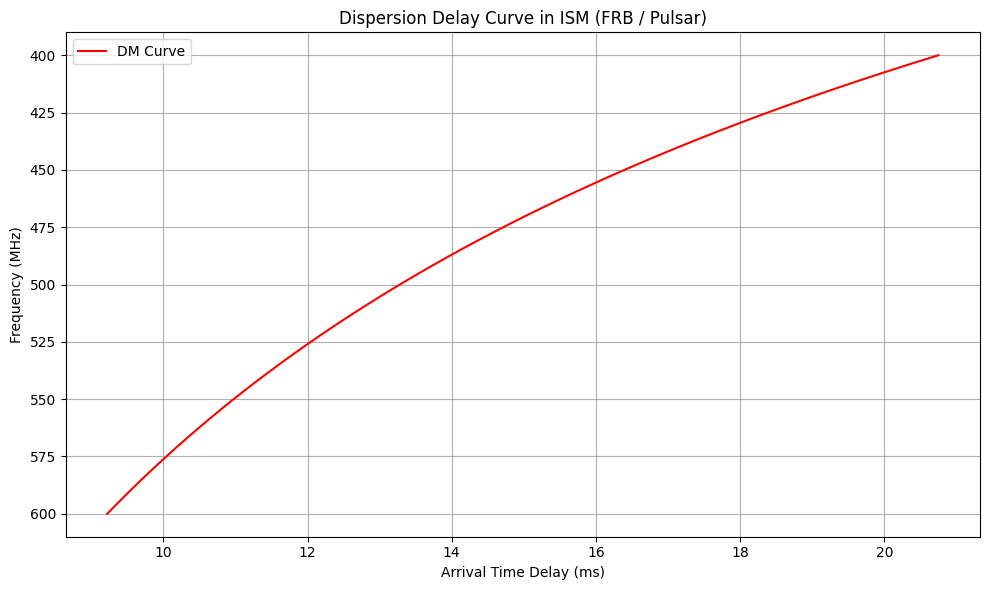

In [4]:

import numpy as np
import matplotlib.pyplot as plt

# Parameters
f_start_mhz = 600
f_end_mhz = 400
DM = 800  # pc/cm^3
K = 4.15e3  # ms·MHz²/(pc·cm⁻³), NOT seconds!

# Frequency array: high to low
f = np.linspace(f_start_mhz, f_end_mhz, 100)  # MHz

# Total delay across the band
total_delay = K * DM * ((1 / f_end_mhz**2) - (1 / f_start_mhz**2))
print("Total delay:", total_delay, "s")

# Delay at each frequency bin
time_delay = K * DM * (1 / f**2)
print("Time delay in each frequency bin:", time_delay)

# Delay difference between bins
time_difference = np.diff(time_delay)
print("Time delay between consecutive bins:", time_difference)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(time_delay, f, '-r', label='DM Curve')
plt.title('Dispersion Delay Curve in ISM (FRB / Pulsar)')
plt.xlabel('Arrival Time Delay (ms)')
plt.ylabel('Frequency (MHz)')
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()  # Lower frequencies arrive later
plt.tight_layout()
plt.show()


Total delay between 600MHz and 400MHz: 11.5244 s


<>:47: SyntaxWarning: invalid escape sequence '\,'
<>:47: SyntaxWarning: invalid escape sequence '\c'
<>:47: SyntaxWarning: invalid escape sequence '\c'
<>:47: SyntaxWarning: invalid escape sequence '\c'
<>:48: SyntaxWarning: invalid escape sequence '\,'
<>:47: SyntaxWarning: invalid escape sequence '\,'
<>:47: SyntaxWarning: invalid escape sequence '\c'
<>:47: SyntaxWarning: invalid escape sequence '\c'
<>:47: SyntaxWarning: invalid escape sequence '\c'
<>:48: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_5384/294745579.py:47: SyntaxWarning: invalid escape sequence '\,'
  f'$K = {K}\, \mathrm{{s\cdot MHz^{{2}}\cdot pc^{{-1}}\cdot cm^{{3}}}}$\n' \
/tmp/ipykernel_5384/294745579.py:47: SyntaxWarning: invalid escape sequence '\c'
  f'$K = {K}\, \mathrm{{s\cdot MHz^{{2}}\cdot pc^{{-1}}\cdot cm^{{3}}}}$\n' \
/tmp/ipykernel_5384/294745579.py:47: SyntaxWarning: invalid escape sequence '\c'
  f'$K = {K}\, \mathrm{{s\cdot MHz^{{2}}\cdot pc^{{-1}}\cdot cm^{{3}}}}$\n' \
/tmp/ipykerne

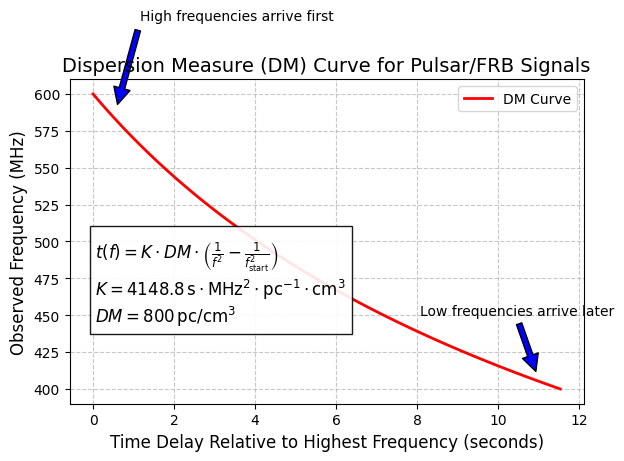

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
DM = 800  # pc/cm³
K = 4148.8  # DM constant (s·MHz²·pc⁻¹·cm³)
f_start_mhz = 600  # MHz
f_end_mhz = 400    # MHz

# Calculate total delay relative to start frequency
total_delay = K * DM * (1/f_end_mhz**2 - 1/f_start_mhz**2)
print(f"Total delay between {f_start_mhz}MHz and {f_end_mhz}MHz: {total_delay:.4f} s")

# Create frequency array in MHz
f = np.linspace(f_start_mhz, f_end_mhz, 100)
f_log = np.logspace(np.log(f_start_mhz),np.log(f_end_mhz), 100) 

# Calculate time delay relative to START frequency
time_delay = K * DM * (1/f**2 - 1/f_start_mhz**2)

# Create plot
#plt.figure(figsize=(10, 6))
plt.plot(time_delay, f, '-r', linewidth=2, label='DM Curve')
#plt.plot(time_delay, f_log, '-r', linewidth=2, label='DM Curve log')
# Add physics annotations
plt.title('Dispersion Measure (DM) Curve for Pulsar/FRB Signals', fontsize=14)
plt.xlabel('Time Delay Relative to Highest Frequency (seconds)', fontsize=12)
plt.ylabel('Observed Frequency (MHz)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Add physical interpretation markers
plt.annotate('High frequencies arrive first', 
             xy=(0.05*total_delay, f_start_mhz-10),
             xytext=(0.1*total_delay, f_start_mhz+50),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             fontsize=10)

plt.annotate('Low frequencies arrive later', 
             xy=(0.95*total_delay, f_end_mhz+10),
             xytext=(0.7*total_delay, f_end_mhz+50),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             fontsize=10)

# Add DM formula
formula_text = r'$t(f) = K \cdot DM \cdot \left( \frac{1}{f^2} - \frac{1}{f_{\mathrm{start}}^2} \right)$' + '\n' \
              f'$K = {K}\, \mathrm{{s\cdot MHz^{{2}}\cdot pc^{{-1}}\cdot cm^{{3}}}}$\n' \
              f'$DM = {DM}\, \mathrm{{pc/cm^{{3}}}}$'
plt.annotate(formula_text, xy=(0.05, 0.25), xycoords='axes fraction', 
            fontsize=12, bbox=dict(facecolor='white', alpha=0.9))

plt.tight_layout()
plt.show()


<>:24: SyntaxWarning: invalid escape sequence '\,'
<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:25: SyntaxWarning: invalid escape sequence '\,'
<>:24: SyntaxWarning: invalid escape sequence '\,'
<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:25: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_5384/3106166324.py:24: SyntaxWarning: invalid escape sequence '\,'
  f'$K = {K}\, \mathrm{{s\cdot MHz^{{2}}\cdot pc^{{-1}}\cdot cm^{{3}}}}$\n' \
/tmp/ipykernel_5384/3106166324.py:24: SyntaxWarning: invalid escape sequence '\c'
  f'$K = {K}\, \mathrm{{s\cdot MHz^{{2}}\cdot pc^{{-1}}\cdot cm^{{3}}}}$\n' \
/tmp/ipykernel_5384/3106166324.py:24: SyntaxWarning: invalid escape sequence '\c'
  f'$K = {K}\, \mathrm{{s\cdot MHz^{{2}}\cdot pc^{{-1}}\cdot cm^{{3}}}}$\n' \
/tmp/ipyke

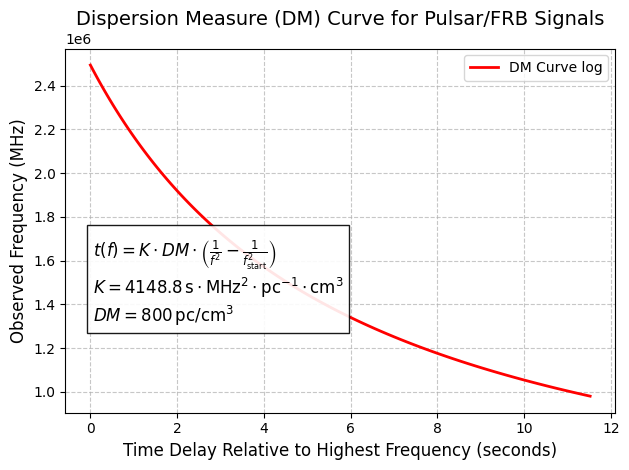

In [6]:
plt.plot(time_delay, f_log, '-r', linewidth=2, label='DM Curve log')
# Add physics annotations
plt.title('Dispersion Measure (DM) Curve for Pulsar/FRB Signals', fontsize=14)
plt.xlabel('Time Delay Relative to Highest Frequency (seconds)', fontsize=12)
plt.ylabel('Observed Frequency (MHz)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Add physical interpretation markers
plt.annotate('High frequencies arrive first', 
             xy=(0.05*total_delay, f_start_mhz-10),
             xytext=(0.1*total_delay, f_start_mhz+50),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             fontsize=10)

plt.annotate('Low frequencies arrive later', 
             xy=(0.95*total_delay, f_end_mhz+10),
             xytext=(0.7*total_delay, f_end_mhz+50),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             fontsize=10)

# Add DM formula
formula_text = r'$t(f) = K \cdot DM \cdot \left( \frac{1}{f^2} - \frac{1}{f_{\mathrm{start}}^2} \right)$' + '\n' \
              f'$K = {K}\, \mathrm{{s\cdot MHz^{{2}}\cdot pc^{{-1}}\cdot cm^{{3}}}}$\n' \
              f'$DM = {DM}\, \mathrm{{pc/cm^{{3}}}}$'
plt.annotate(formula_text, xy=(0.05, 0.25), xycoords='axes fraction', 
            fontsize=12, bbox=dict(facecolor='white', alpha=0.9))

plt.tight_layout()
plt.show()

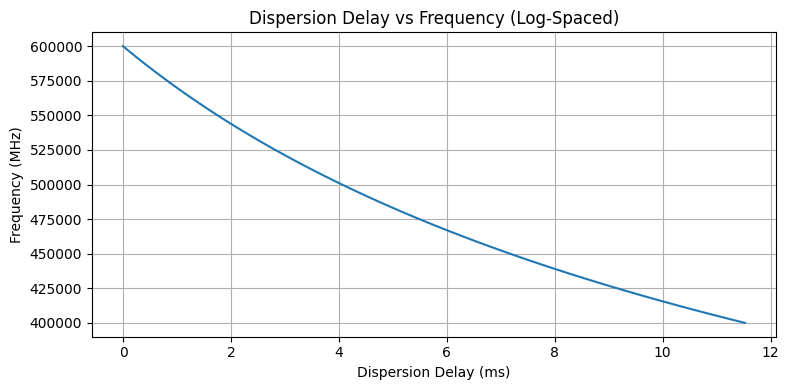

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
DM = 800                     # pc/cm³
K = 4148.8                   # MHz^2 pc^-1 cm^3 s
f_start = 600                # MHz
f_stop = 400                 # MHz
num_points = 101

# Logarithmic frequency array (descending from f_start to f_stop)
freqs = np.logspace(np.log10(f_start), np.log10(f_stop), num=num_points)

# Dispersion delay relative to highest frequency
t_delay = K * DM * (1 / freqs**2 - 1 / f_start**2)  # in seconds

# Plot
plt.figure(figsize=(8, 4))
plt.plot(t_delay, freqs * 1e3)  # Convert to milliseconds
plt.ylabel("Frequency (MHz)")
plt.xlabel("Dispersion Delay (ms)")
plt.title("Dispersion Delay vs Frequency (Log-Spaced)")
#plt.gca().invert_xaxis()  # Higher freq on the left, like typical plots
plt.grid(True)
plt.tight_layout()
plt.show()


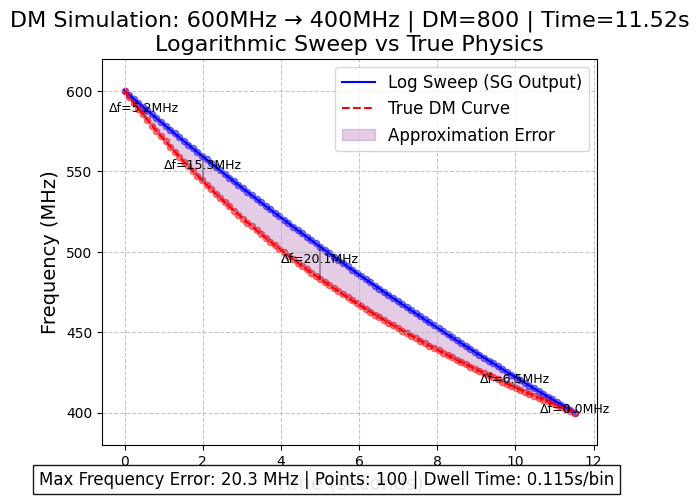

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
K = 4148.8  # s·MHz²·pc⁻¹·cm³ (DM constant)
DM = 800    # pc/cm³
f_start = 600  # MHz
f_stop = 400   # MHz
num_points = 100

# Calculate TOTAL DISPERSION DELAY (sweep time must equal this)
total_delay = K * DM * (1/f_stop**2 - 1/f_start**2)
sweep_time = total_delay  # Critical equality!

# Time array for both curves
t = np.linspace(0, sweep_time, num_points)

# 1. Logarithmic sweep (SG output)
log_freq = f_start * (f_stop/f_start) ** (t/sweep_time)

# 2. True DM curve (physical reality)
dm_freq = 1 / np.sqrt((1/f_start**2) + (t/(K*DM)))

# Create figure
plt.figure(figsize=(6, 5))
plt.plot(t, log_freq, 'b-', label=f'Log Sweep (SG Output)')
plt.scatter(t, log_freq, color='blue', s=20, alpha=0.5)

plt.plot(t, dm_freq, 'r--', label=f'True DM Curve')
plt.scatter(t, dm_freq, color='red', s=20, alpha=0.5)

# Add error visualization
error = log_freq - dm_freq
plt.fill_between(t, dm_freq, dm_freq + error, color='purple', alpha=0.2, 
                 label='Approximation Error')

# Key points
for time_point in [0.5, 2, 5, 10, total_delay]:
    log_val = f_start * (f_stop/f_start) ** (time_point/sweep_time)
    dm_val = 1 / np.sqrt((1/f_start**2) + (time_point/(K*DM)))
    plt.plot([time_point, time_point], [log_val, dm_val], 'k-', alpha=0.3)
    plt.text(time_point, (log_val+dm_val)/2, 
             f'Δf={abs(log_val-dm_val):.1f}MHz', 
             fontsize=9, ha='center')

# Formatting
plt.title(f'DM Simulation: {f_start}MHz → {f_stop}MHz | DM={DM} | Time={sweep_time:.2f}s\n'
          f'Logarithmic Sweep vs True Physics', fontsize=16)
plt.xlabel('Time (seconds)', fontsize=14)
plt.ylabel('Frequency (MHz)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.ylim(380, 620)

# Add statistics
max_error = np.max(np.abs(error))
plt.figtext(0.5, 0.02, 
            f"Max Frequency Error: {max_error:.1f} MHz | "
            f"Points: {num_points} | Dwell Time: {sweep_time/num_points:.3f}s/bin",
            ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.9))

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.savefig('DMsweep.png')
plt.show()

 # SPIE CODE

In [9]:
:SOURce1:FREQ:STARt 600e6
:SOURce1:FREQ:STOP 400e6
:SOURce1:SWEep:TIME 16.534  ; Total dispersion delay
:SOURce1:SWEep:SPACing LOG
:SOURce1:SWEep:POINts 100

SyntaxError: invalid syntax (692909380.py, line 1)

In [10]:
*RST
:SOURce1:FREQ:STARt 600e6
:SOURce1:FREQ:STOP 400e6
:SOURce1:SWEep:TIME 16.534  ; MUST equal total dispersion delay
:SOURce1:SWEep:SPACing LOG
:SOURce1:SWEep:POINts 100
:SOURce1:POW:LEVel -10
:OUTPut1:STATe ON
:TRIGger:SOURce BUS
:INITiate:CONTinuous OFF
:TRIGger

SyntaxError: invalid syntax (4087131330.py, line 2)

In [11]:
#Bus trigger connect SG from remote like LAN, GPIB etc

In [12]:
import pyvisa
import numpy as np
import time
import sys

DM = 800
K = 4148.8
freq_hi = 600 # MHz
freq_lo = 400 # MHz
n_point = 800
t_total = K*DM*(1/freq_lo**2-1/freq_hi**2) # sec
t_sep = t_total/n_point # sec
print('duration:', t_total)
print('t_separation:', t_sep)
t_points = np.arange(n_point)*t_sep # sec 

freqs = 1 / np.sqrt(t_points/(K*DM) + 1/freq_hi**2) # MHz


duration: 11.524444444444445
t_separation: 0.014405555555555555


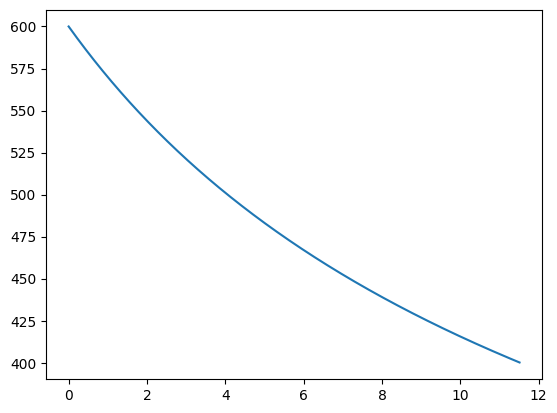

In [13]:
plt.plot(t_points, freqs)

In [11]:
pwd

'C:\\Users\\bishn\\ringbuff'